In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import numpy as np

In [2]:
import json

data = json.load(open('int_bosons_2d_N=20_L=20.log', 'rb'))

Es = jnp.array(data['Energy']['Mean'])
sigmas = jnp.array(data['Energy']['Sigma'])
acceptance = jnp.array(data['acceptance']['value'])

2023-04-16 18:25:59.255621: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
window_size = 10
mov_avg = []
mov_std = []
for i in range(len(Es) - window_size + 1):
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = Es[i : i + window_size]
  
    # Calculate the average of current window
    window_average = jnp.mean(window)
    window_std = jnp.std(window)
      
    # Store the average of current
    # window in moving average list
    mov_avg.append(window_average)
    mov_std.append(window_std)

mov_avg = jnp.array(mov_avg)/20
mov_std = jnp.array(mov_std)/20

'\naxins = ax.inset_axes([0.25, 0.5, 0.7, 0.2])\naxins.plot(jnp.arange(len(mov_avg)), mov_avg, color=\'C0\')\naxins.fill_between(jnp.arange(len(mov_avg)), mov_avg - mov_std, mov_avg + mov_std, color=\'C0\', alpha=0.2)\nx1, x2, y1, y2 = 130, 190, 1.237-0.05, 1.237+0.05\naxins.set_xlim(x1, x2)\naxins.set_ylim(y1, y2)\n#axins.set_yticks([1.236, 1.237, 1.238])\naxins.set_xticks([130,160,190])\naxins.yaxis.set_major_formatter(FormatStrFormatter(\'%.2f\'))\naxins.grid(alpha=0.5)\nax.indicate_inset_zoom(axins, edgecolor="black")\n'

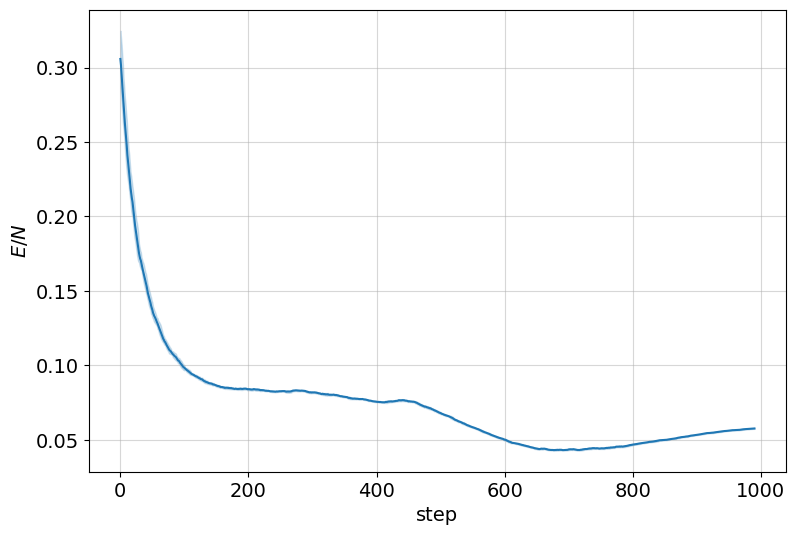

In [4]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(jnp.arange(len(mov_avg)), mov_avg, color='C0')
ax.fill_between(jnp.arange(len(mov_avg)), (mov_avg - mov_std), (mov_avg + mov_std), color='C0', alpha=0.2)
ax.set_xlabel('step')
ax.set_ylabel(r'$E/N$')
ax.grid(alpha=0.5)

"""
axins = ax.inset_axes([0.25, 0.5, 0.7, 0.2])
axins.plot(jnp.arange(len(mov_avg)), mov_avg, color='C0')
axins.fill_between(jnp.arange(len(mov_avg)), mov_avg - mov_std, mov_avg + mov_std, color='C0', alpha=0.2)
x1, x2, y1, y2 = 130, 190, 1.237-0.05, 1.237+0.05
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.set_yticks([1.236, 1.237, 1.238])
axins.set_xticks([130,160,190])
axins.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins.grid(alpha=0.5)
ax.indicate_inset_zoom(axins, edgecolor="black")
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


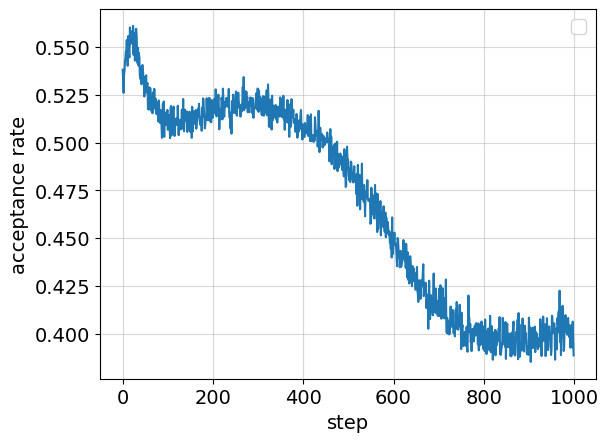

In [6]:
steps = jnp.arange(0,len(acceptance))

fig, ax = plt.subplots()

ax.plot(steps, acceptance)
ax.set_xlabel('step')
ax.set_ylabel(r'acceptance rate')
ax.grid(alpha=0.5)
ax.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


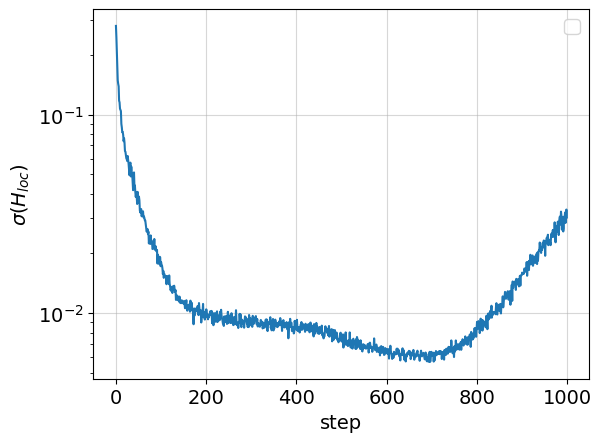

In [7]:
fig, ax = plt.subplots()

ax.plot(steps, sigmas)
ax.set_xlabel('step')
ax.set_ylabel(r'$\sigma(H_{loc})$')
ax.grid(alpha=0.5)
ax.set_yscale('log')
ax.legend(loc='best')

In [ ]:
with open("int_bosons_1.mpack", 'rb') as file:
  vstate.variables = flax.serialization.from_bytes(vstate.variables, file.read())